In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Computer Science & Engineering\Jupyter Notebook project\EDA Project of Amazon Sales Data\amazon_sales_dataset.csv")

In [ ]:
# Basic Information and Structure

In [6]:
print("Basic Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null  

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [10]:
# 1. Product Insights

In [11]:
# Top 10 products by rating count
top_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)
print("\nTop 10 Products by Rating Count:")
print(top_products)


Top 10 Products by Rating Count:
                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97


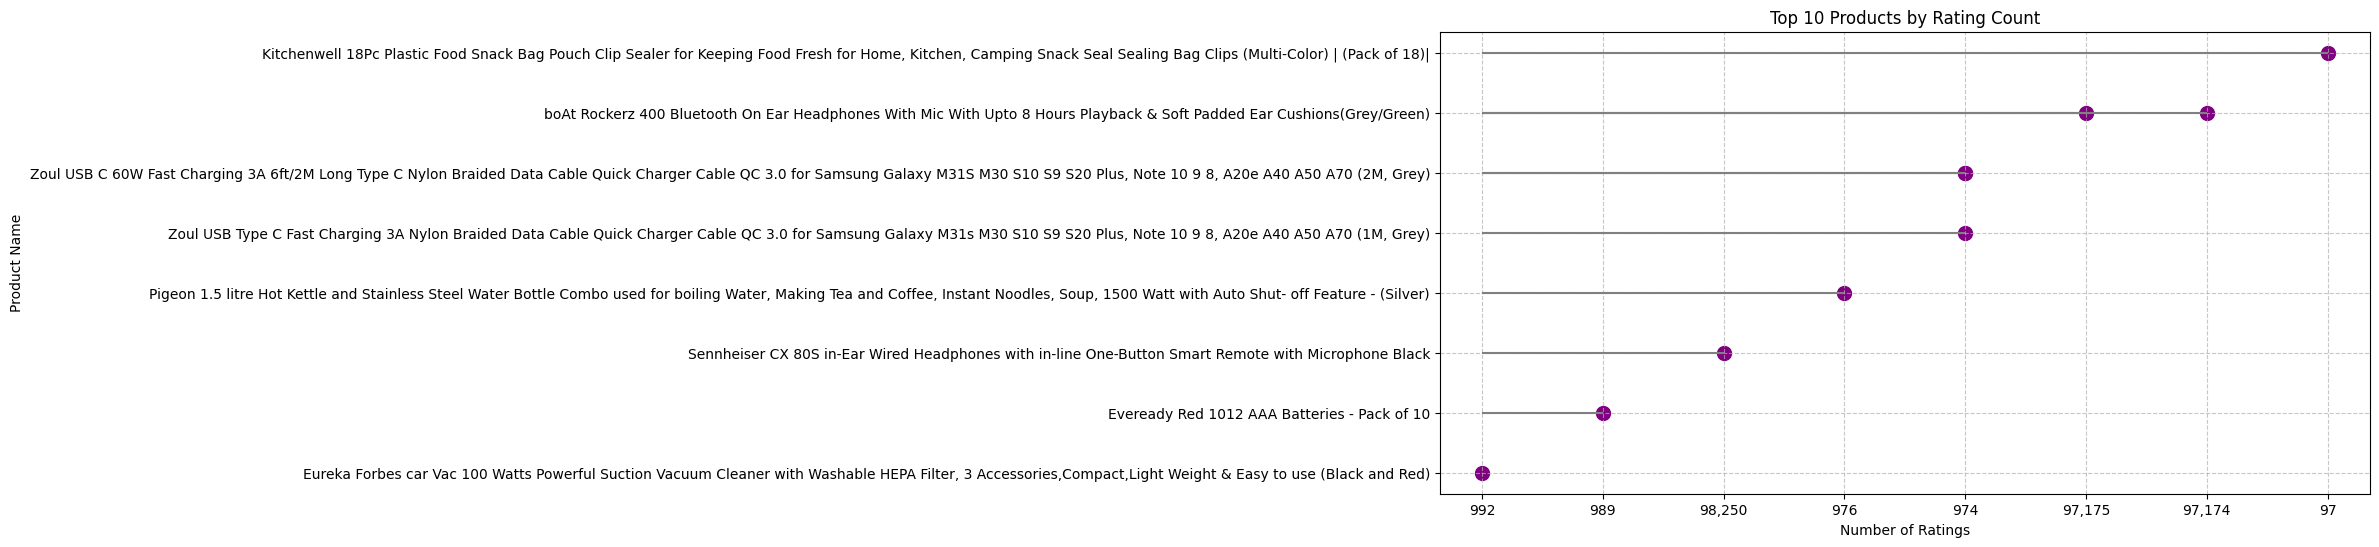

In [52]:
plt.figure(figsize=(12, 6))
plt.hlines(y=top_products['product_name'], xmin=0, xmax=top_products['rating_count'], color='gray')
plt.scatter(top_products['rating_count'], top_products['product_name'], color='purple', s=100)
plt.title("Top 10 Products by Rating Count")
plt.xlabel("Number of Ratings")
plt.ylabel("Product Name")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [12]:
# Top product categories by the number of products
top_categories = df['category'].value_counts().head(10)
print("\nTop 10 Categories by Number of Products:")
print(top_categories)


Top 10 Categories by Number of Products:
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                            24
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables               

C:\Users\h.sadheen19\AppData\Local\Temp\ipykernel_20964\2250194342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


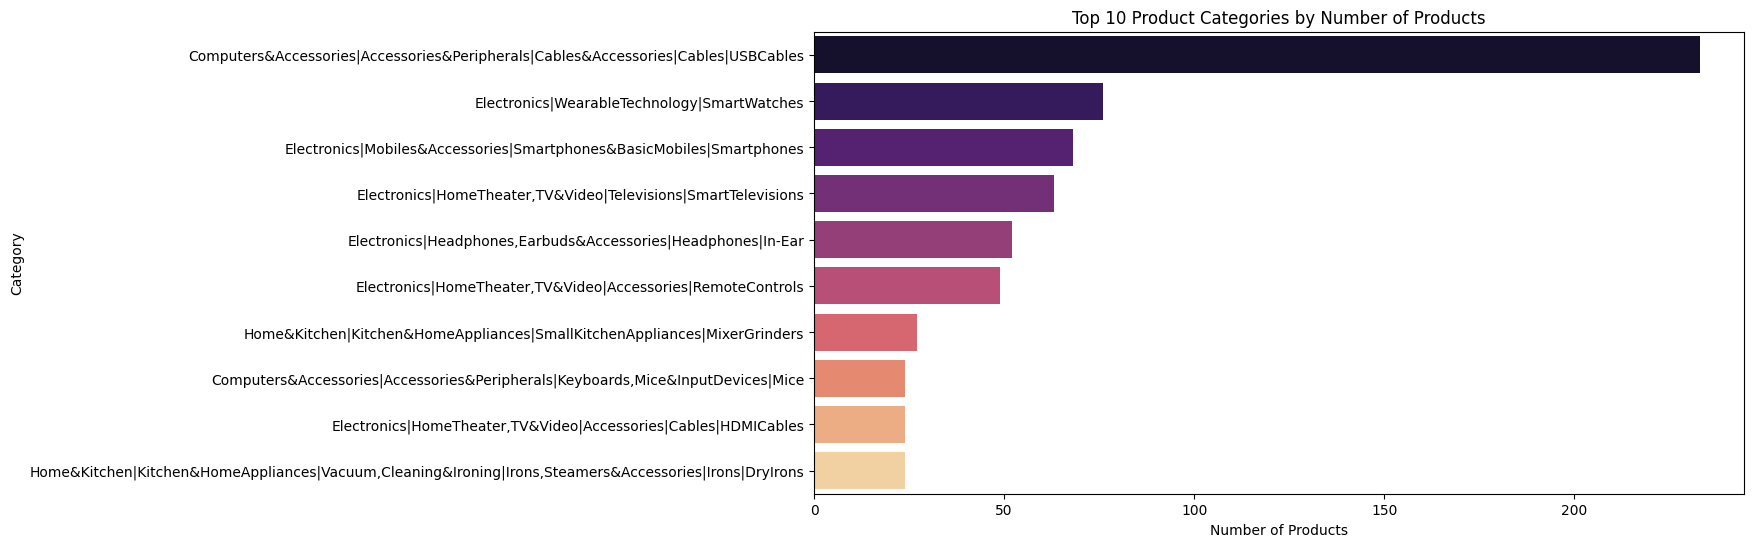

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")
plt.title("Top 10 Product Categories by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.show()

In [13]:
# 2. Pricing Insights

In [14]:
# Average discount percentage
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)
average_discount = df['discount_percentage'].mean()
print(f"\nAverage Discount Percentage: {average_discount:.2f}%")


Average Discount Percentage: 47.69%


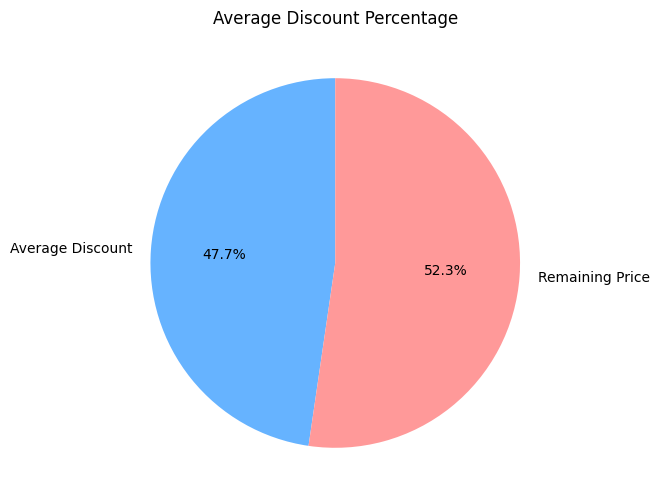

In [55]:
# Average Discount vs remaining price
discount_data = [average_discount, 100 - average_discount]
labels = ['Average Discount', 'Remaining Price']
plt.figure(figsize=(6, 6))
plt.pie(discount_data, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title("Average Discount Percentage")
plt.show()

In [20]:
# 3. Review Insights

In [23]:
# Most reviewed products (based on rating count)
most_reviewed = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)
print("\nTop 10 Most Reviewed Products:")
print(most_reviewed)


Top 10 Most Reviewed Products:
                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97


C:\Users\h.sadheen19\AppData\Local\Temp\ipykernel_20964\3938832302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='rating_count', y='product_name', data=top_reviewed_products, palette="Blues_d")


Text(0, 0.5, 'Product Name')

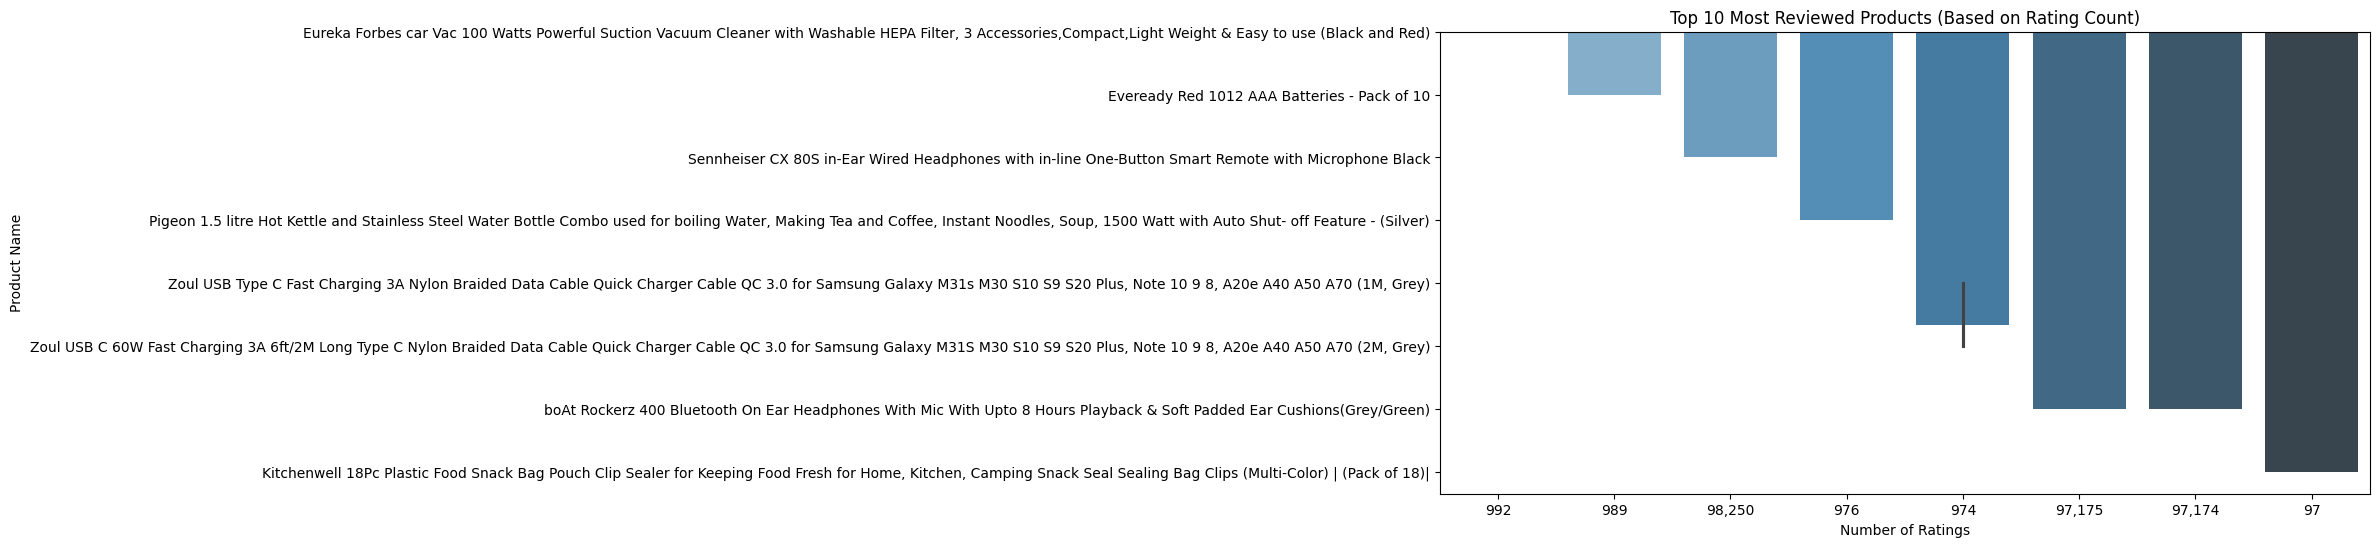

In [63]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='rating_count', y='product_name', data=top_reviewed_products, palette="Blues_d")
plt.title("Top 10 Most Reviewed Products (Based on Rating Count)")
plt.xlabel("Number of Ratings")
plt.ylabel("Product Name")